In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"riyamanandhar","key":"9a667a9e11ae60ece11295030400ab75"}'}

In [2]:
# create kaggle folder
! mkdir ~/.kaggle

In [3]:
#copy the kaggle.json file to folder creator
! cp kaggle.json ~/.kaggle/

In [4]:
#permission for json to act
!chmod 600 ~/.kaggle/kaggle.json

In [5]:
# to list all dataset
! kaggle datasets list

ref                                                               title                                               size  lastUpdated          downloadCount  voteCount  usabilityRating  
----------------------------------------------------------------  -------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
nelgiriyewithana/global-youtube-statistics-2023                   Global YouTube Statistics 2023                      60KB  2023-07-28 15:36:38           9356        313  1.0              
arjunajn/netflix-watch-log                                        Netflix Watch Log                                  295KB  2023-08-22 08:23:45            582         27  1.0              
vincentcornlius/sales-orders                                      sales orders                                         5MB  2023-08-24 14:04:11            702         23  0.8235294        
kapturovalexander/gold-and-silver-prices-2013-2023     

In [6]:
!kaggle datasets download -d adityakadiwal/water-potability

  0% 0.00/251k [00:00<?, ?B/s]
100% 251k/251k [00:00<00:00, 15.5MB/s]


In [12]:
!unzip water-potability.zip

Archive:  water-potability.zip
  inflating: water_potability.csv    


In [13]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [14]:
df = pd.read_csv("water_potability.csv")

In [15]:
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [16]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [20]:
df.isna().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [21]:
# Drop rows with missing values
df.dropna(inplace=True)

In [22]:
df.isna().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [23]:
# Split data into features (X) and target (y)
X = df.drop('Potability', axis=1)
y = df['Potability']

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [69]:
from sklearn.preprocessing import StandardScaler

In [70]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [71]:
from sklearn.linear_model import LogisticRegression

In [72]:
model = LogisticRegression(max_iter = 5000)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [73]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [74]:
confusion_matrix(y_test, y_pred)

array([[231,   0],
       [172,   0]])

In [75]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.57      1.00      0.73       231
           1       0.00      0.00      0.00       172

    accuracy                           0.57       403
   macro avg       0.29      0.50      0.36       403
weighted avg       0.33      0.57      0.42       403



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [76]:
accuracy_score(y_test, y_pred)*100

57.32009925558312

In [77]:
conf_matrix = confusion_matrix(y_test, y_pred)

In [78]:
conf_matrix

array([[231,   0],
       [172,   0]])

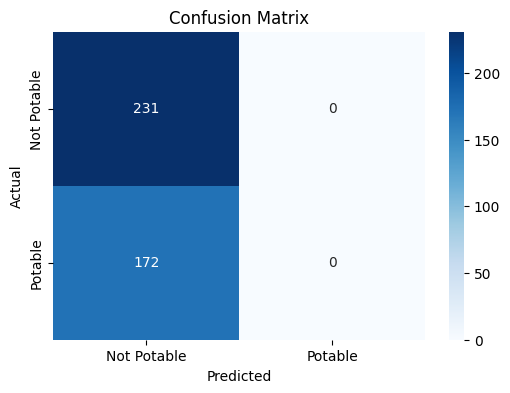

In [79]:
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Potable', 'Potable'],
            yticklabels=['Not Potable', 'Potable'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [80]:
from sklearn.tree import DecisionTreeClassifier

In [81]:
model = DecisionTreeClassifier()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [82]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.68      0.71      0.69       231
           1       0.58      0.55      0.56       172

    accuracy                           0.64       403
   macro avg       0.63      0.63      0.63       403
weighted avg       0.64      0.64      0.64       403



In [83]:
model.score(X_test,y_test)

0.6401985111662531

In [84]:
from sklearn.ensemble import RandomForestClassifier

In [85]:
model = RandomForestClassifier()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [86]:
model.score(X_test, y_test)

0.6799007444168734